In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest  , chi2
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import csv
import timeit


#**Drebin SigAPI**

In [ ]:
drebin = pd.read_csv('drebin_sigapi.csv')
drebin

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,Ljava.net.URLDecoder,...,TelephonyManager.getSimOperator,onBind,Process.start,Context.bindService,ProcessBuilder,Ljava.lang.Class.getResource,defineClass,findClass,Runtime.loadLibrary,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15026,1,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
15027,0,0,0,0,0,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,0
15028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15029,1,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,1,0,1,0,0


In [ ]:
drebin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15031 entries, 0 to 15030
Data columns (total 74 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   transact                                     15031 non-null  int64
 1   onServiceConnected                           15031 non-null  int64
 2   bindService                                  15031 non-null  int64
 3   attachInterface                              15031 non-null  int64
 4   ServiceConnection                            15031 non-null  int64
 5   android.os.Binder                            15031 non-null  int64
 6   Ljava.lang.Class.getCanonicalName            15031 non-null  int64
 7   Ljava.lang.Class.getMethods                  15031 non-null  int64
 8   Ljava.lang.Class.cast                        15031 non-null  int64
 9   Ljava.net.URLDecoder                         15031 non-null  int64
 10  android.content.pm.Sig

# **Função Incremento** 

In [ ]:


def calculateMutualInformationGain(features, target, k):
    feature_names = features.columns
    mutualInformationGain = mutual_info_classif(features, target, random_state = 0)
    data = {"features": feature_names, "score": mutualInformationGain}
    df = pd.DataFrame(data)
    df = df.sort_values(by=['score'], ascending=False)
    return df[:k]

def calculateRandomForestClassifier(features, target,k):
    feature_names= np.array(X.columns.values.tolist())
    test = RandomForestClassifier(random_state = 0)
    test = test.fit(X,y)
    model = SelectFromModel(test,max_features = k, prefit = True)
    model.get_support()
    best_features = feature_names[model.get_support()]
    best_score = test.feature_importances_[model.get_support()]
    df = pd.DataFrame(list(zip(best_features,best_score)),columns=['features','score']).sort_values(by= ['score'],ascending= False)
    return df

def calculateExtraTreesClassifier(features, target, k):
    feature_names= np.array(X.columns.values.tolist())
    test = ExtraTreesClassifier(random_state = 0)
    test = test.fit(X,y)
    model = SelectFromModel(test,max_features = k, prefit = True)
    model.get_support()
    best_features = feature_names[model.get_support()]
    best_score = test.feature_importances_[model.get_support()]
    df = pd.DataFrame(list(zip(best_features,best_score)),columns=['features','score']).sort_values(by= ['score'],ascending= False)
    return df



def calculateRFERandomForestClassifier(features, target, k):
    feature_names= np.array(X.columns.values.tolist())
    rfe = RFE(estimator = RandomForestClassifier(), n_features_to_select = k)
    model = rfe.fit(X,y)
    best_features = feature_names[model.support_]
    best_scores = rfe.estimator_.feature_importances_
    df = pd.DataFrame(list(zip(best_features, best_scores)), columns = ["features", "score"]).sort_values(by = ['score'], ascending=False)
    return df

def calculateRFEGradientBoostingClassifier(features, target,k):
    feature_names= np.array(X.columns.values.tolist())
    rfe = RFE(estimator = GradientBoostingClassifier(), n_features_to_select = k)
    model = rfe.fit(X,y)
    best_features = feature_names[model.support_]
    best_scores = rfe.estimator_.feature_importances_
    df = pd.DataFrame(list(zip(best_features, best_scores)), columns = ["features", "score"]).sort_values(by = ['score'], ascending=False)
    return df


def calculateSelectKBest(features, target,k):
    feature_names= np.array(features.columns.values.tolist())
    chi2_selector= SelectKBest(score_func = chi2, k= k)
    chi2_selector.fit(features,target)
    chi2_scores = pd.DataFrame(list(zip(feature_names,chi2_selector.scores_)),columns= ['features','score'])
    df = pd.DataFrame(list(zip(feature_names,chi2_selector.scores_)),columns= ['features','score']).sort_values(by = ['score'], ascending=False)
    return df[:k]


def calculateMetricas(new_X,y):
    new_X_train,new_X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.3,random_state = 0)

    teste = RandomForestClassifier()
    teste.fit(new_X_train, y_train)
    resultado_teste = teste.predict(new_X_test)

    acuracia = accuracy_score(y_test, resultado_teste)
    precision = precision_score(y_test, resultado_teste)
    recall = recall_score(y_test, resultado_teste)
    f1 = f1_score(y_test, resultado_teste)
   
    metricas = [acuracia,precision,recall,f1]
    return metricas

In [ ]:
l_mutualInformation = [[0,0,0,0,0]]
l_selectRandom = [[0,0,0,0,0]]
l_selectExtra= [[0,0,0,0,0]]
l_RFERandom = [[0,0,0,0,0]]
l_RFEGradient = [[0,0,0,0,0]]
l_selectKBest= [[0,0,0,0,0]]
if __name__=="__main__":
    drebin = pd.read_csv('drebin_sigapi.csv')
    X = drebin.drop(columns = ['class']) #variaveis (features)
    y = drebin['class'] #classification eh a classificacao de benignos e malwares
    total_features = drebin.shape[1] - 1 #CLASS
    num_features = 1
    increment = 1
    while num_features < (total_features + increment):
        k = total_features if num_features > total_features else num_features
       
        print(">>> NÚMERO DE FEATURES ",k, "<<<")
        print(">>> MUTUAL INFORMATION GAIN <<<")
        mutualinformationGain = calculateMutualInformationGain(X, y, k)
        new_X = X[list(mutualinformationGain['features'])]

        result_metricas =  calculateMetricas(new_X,y)
        l_mutualInformation = np.append(l_mutualInformation,[[k,result_metricas[0],result_metricas[1],result_metricas[2],result_metricas[3]]],axis=0)
        print(l_mutualInformation)

        a_mutualInformation = open('Metricas_MutualGain.csv', 'w', newline='', encoding='utf-8')
        w_mutualInformation = csv.writer(a_mutualInformation)
        w_mutualInformation.writerow([l_mutualInformation])
        arquivo_mutualInformation = open('Metricas_MutualGain.csv')
        

        print(">>> SELECTFROMMODEL USING RANDOM FOREST CLASSIFIER <<<")
        randomForestClassifier = calculateRandomForestClassifier(X, y, k)
        new_X = X[list(randomForestClassifier['features'])]

        result_metricas =  calculateMetricas(new_X,y)
        l_selectRandom = np.append(l_selectRandom,[[k,result_metricas[0],result_metricas[1],result_metricas[2],result_metricas[3]]],axis=0)
        print(l_selectRandom)
        a_selectRandom = open('Metricas_SelectRFC.csv', 'w', newline='', encoding='utf-8')
        w_selectRandom = csv.writer(a_selectRandom)
        w_selectRandom.writerow([l_selectRandom])
        arquivo_selectRandom = open('Metricas_SelectRFC.csv')
        

        print(">>> SELECTFROMMODEL USING EXTRA TREES CLASSIFIER <<<")
        extraTreesClass = calculateExtraTreesClassifier(X, y, k)
        new_X = X[list(extraTreesClass['features'])]

        result_metricas =  calculateMetricas(new_X,y)
        l_selectExtra = np.append(l_selectExtra,[[k,result_metricas[0],result_metricas[1],result_metricas[2],result_metricas[3]]],axis=0)
        print(l_selectExtra)
        a_selectExtra = open('Metricas_SelectETC.csv', 'w', newline='', encoding='utf-8')
        w_selectExtra = csv.writer(a_selectExtra)
        w_selectExtra.writerow([l_selectExtra])
        arquivo_selectExtra = open('Metricas_SelectETC.csv')

        print(">>> RFE USING RANDOM FOREST CLASSIFIER <<<")
        RFERandomForestClassifier = calculateRFERandomForestClassifier(X,y, k)
        new_X = X[list(RFERandomForestClassifier['features'])]
        
        result_metricas =  calculateMetricas(new_X,y)
        l_RFERandom= np.append(l_RFERandom,[[k,result_metricas[0],result_metricas[1],result_metricas[2],result_metricas[3]]],axis=0)
        print(l_RFERandom)
        a_RFERandom = open('Metricas_RFERandom.csv', 'w', newline='', encoding='utf-8')
        w_RFERandom = csv.writer(a_RFERandom)
        w_RFERandom.writerow([l_RFERandom])
        arquivo_RFERandom = open('Metricas_RFERandom.csv')


        print(">>> RFE USING GRADIENT BOOSTING CLASSIFIER <<<")
        RFEGradientBoostingClassifier = calculateRFEGradientBoostingClassifier(X,y, k)
        new_X = X[list(RFEGradientBoostingClassifier['features'])]

        result_metricas =  calculateMetricas(new_X,y)
        l_RFEGradient = np.append(l_RFEGradient,[[k,result_metricas[0],result_metricas[1],result_metricas[2],result_metricas[3]]],axis=0)
        print(l_RFEGradient)
        a_RFEGradient = open('Metricas_RFEGradient.csv', 'w', newline='', encoding='utf-8')
        w_RFEGradient= csv.writer(a_RFEGradient)
        w_RFEGradient.writerow([l_RFEGradient])
        arquivo_RFEGradient = open('Metricas_RFEGradient.csv')
       


        print(">>> SELECT K BEST <<<")
        selectKBest = calculateSelectKBest(X,y,k)
        new_X = X[list(selectKBest['features'])]

        result_metricas =  calculateMetricas(new_X,y)
        l_selectKBest = np.append(l_selectKBest,[[k,result_metricas[0],result_metricas[1],result_metricas[2],result_metricas[3]]],axis=0)
        print(l_selectKBest)

        a_selectKBest = open('Metricas_SelectKBest.csv', 'w', newline='', encoding='utf-8')
        w_selectKBest = csv.writer(a_selectKBest)
        w_selectKBest.writerow([l_selectKBest])
        arquivo_selectKBest = open('Metricas_SelectKBest.csv')



        num_features += increment


A saída de streaming foi truncada nas últimas 5000 linhas.
 [ 9.          0.80842572  0.66487936  0.92883895  0.775     ]
 [10.          0.80953437  0.66666667  0.92759051  0.77577656]
 [11.          0.81108647  0.66891892  0.92696629  0.77708006]
 [12.          0.82039911  0.69411765  0.88389513  0.77759473]
 [13.          0.82350333  0.69911067  0.88327091  0.78047435]
 [14.          0.82461197  0.69965534  0.88701623  0.7822736 ]
 [15.          0.82749446  0.70019436  0.89950062  0.78743169]
 [16.          0.83126386  0.71014493  0.88701623  0.78878712]
 [17.          0.85720621  0.87017002  0.70287141  0.77762431]
 [18.          0.8616408   0.88933121  0.69725343  0.7816655 ]
 [19.          0.91707317  0.91598916  0.84394507  0.87849253]
 [20.          0.91818182  0.91237458  0.85143571  0.88085244]
 [21.          0.91685144  0.92992292  0.82833958  0.87619676]
 [22.          0.92771619  0.92363878  0.86828964  0.8951094 ]
 [23.          0.93547672  0.93497014  0.87952559  0.906400

In [ ]:
df_mutualInformation= pd.DataFrame(l_mutualInformation,columns=['Número de Características','Acurácia','Precisão','Recall','F1 Score'])
df_selectRandom= pd.DataFrame(l_selectRandom,columns=['Número de Características','Acurácia','Precisão','Recall','F1 Score'])
df_selectExtra= pd.DataFrame(l_selectExtra,columns=['Número de Características','Acurácia','Precisão','Recall','F1 Score'])
df_RFERandom= pd.DataFrame(l_RFERandom,columns=['Número de Características','Acurácia','Precisão','Recall','F1 Score'])
df_RFEGradient= pd.DataFrame(l_RFEGradient,columns=['Número de Características','Acurácia','Precisão','Recall','F1 Score'])
df_selectKBest= pd.DataFrame(l_selectKBest,columns=['Número de Características','Acurácia','Precisão','Recall','F1 Score'])

In [ ]:
df_mutualInformation


,Número de Características,Acurácia,Precisão,Recall,F1 Score
0,0.0,0.000000,0.000000,0.000000,0.000000
1,1.0,0.747672,0.590554,0.944444,0.726705
2,2.0,0.768514,0.620884,0.894507,0.732992
3,3.0,0.770510,0.623422,0.893883,0.734547
4,4.0,0.770510,0.623422,0.893883,0.734547
...,...,...,...,...,...
69,69.0,0.980488,0.980940,0.963795,0.972292
70,70.0,0.980710,0.980952,0.964419,0.972616
71,71.0,0.980488,0.981552,0.963171,0.972275
72,72.0,0.979601,0.978454,0.963795,0.971069


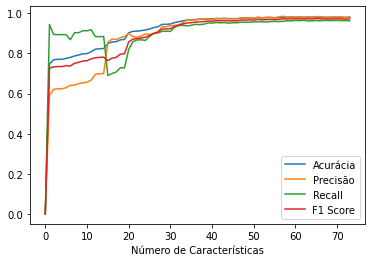

In [ ]:
df_mutualInformation.to_csv("data1.csv", index = False)
grafico1 = pd.read_csv("data1.csv", index_col=0, parse_dates=True)
grafico1.plot()

In [ ]:
df_selectRandom


,Número de Características,Acurácia,Precisão,Recall,F1 Score
0,0.0,0.000000,0.000000,0.000000,0.000000
1,1.0,0.750998,0.798257,0.400125,0.533056
2,2.0,0.777827,0.968750,0.387016,0.553078
3,3.0,0.874279,0.848016,0.787141,0.816445
4,4.0,0.875831,0.852981,0.785893,0.818064
...,...,...,...,...,...
69,69.0,0.958537,0.958522,0.923221,0.940541
70,70.0,0.958537,0.957337,0.924469,0.940616
71,71.0,0.958758,0.956774,0.925718,0.940990
72,72.0,0.960976,0.958816,0.930087,0.944233


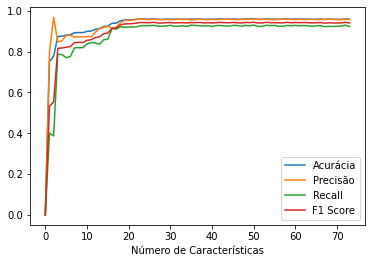

In [ ]:
df_selectRandom.to_csv("data2.csv", index = False)
grafico2 = pd.read_csv("data2.csv", index_col=0, parse_dates=True)
grafico2.plot()

In [ ]:
df_selectExtra


,Número de Características,Acurácia,Precisão,Recall,F1 Score
0,0.0,0.000000,0.000000,0.000000,0.000000
1,1.0,0.750998,0.798257,0.400125,0.533056
2,2.0,0.773614,0.966292,0.375780,0.541124
3,3.0,0.873614,0.827827,0.813358,0.820529
4,4.0,0.879379,0.830625,0.829588,0.830106
...,...,...,...,...,...
69,69.0,0.958980,0.950987,0.932584,0.941696
70,70.0,0.960532,0.956410,0.931336,0.943707
71,71.0,0.959645,0.958656,0.926342,0.942222
72,72.0,0.958980,0.951562,0.931960,0.941659


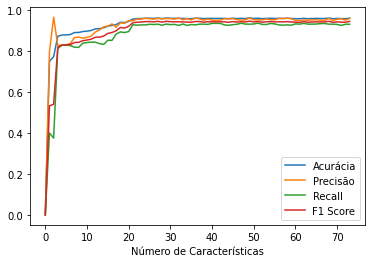

In [ ]:
df_selectExtra.to_csv("data3.csv", index = False)
grafico3 = pd.read_csv("data3.csv", index_col=0, parse_dates=True)
grafico3.plot()

In [ ]:
df_RFERandom


,Número de Características,Acurácia,Precisão,Recall,F1 Score
0,0.0,0.000000,0.000000,0.000000,0.000000
1,1.0,0.747672,0.590554,0.944444,0.726705
2,2.0,0.768514,0.620884,0.894507,0.732992
3,3.0,0.776275,0.626764,0.915106,0.743974
4,4.0,0.879379,0.830625,0.829588,0.830106
...,...,...,...,...,...
69,69.0,0.979823,0.979683,0.963171,0.971357
70,70.0,0.981375,0.981599,0.965668,0.973568
71,71.0,0.980488,0.982166,0.962547,0.972257
72,72.0,0.981153,0.982200,0.964419,0.973228


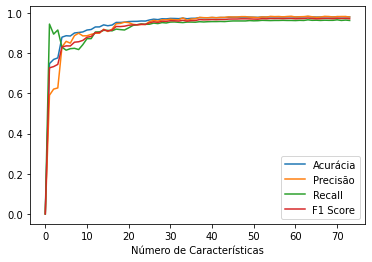

In [ ]:
df_RFERandom.to_csv("data4.csv", index = False)
grafico4 = pd.read_csv("data4.csv", index_col=0, parse_dates=True)
grafico4.plot()

In [ ]:
df_RFEGradient


,Número de Características,Acurácia,Precisão,Recall,F1 Score
0,0.0,0.000000,0.000000,0.000000,0.000000
1,1.0,0.747672,0.590554,0.944444,0.726705
2,2.0,0.805100,0.791297,0.612984,0.690820
3,3.0,0.805987,0.776847,0.636704,0.699828
4,4.0,0.879379,0.830625,0.829588,0.830106
...,...,...,...,...,...
69,69.0,0.980488,0.980330,0.964419,0.972310
70,70.0,0.981375,0.982824,0.964419,0.973535
71,71.0,0.981596,0.984066,0.963795,0.973825
72,72.0,0.979379,0.980880,0.960674,0.970672


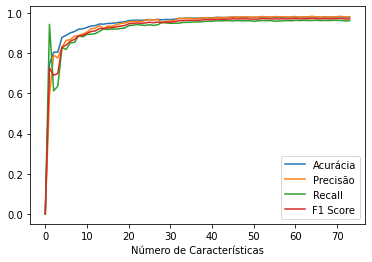

In [ ]:
df_RFEGradient.to_csv("data5.csv", index = False)
grafico5 = pd.read_csv("data5.csv", index_col=0, parse_dates=True)
grafico5.plot()

In [ ]:
df_selectKBest


,Número de Características,Acurácia,Precisão,Recall,F1 Score
0,0.0,0.000000,0.000000,0.000000,0.000000
1,1.0,0.747672,0.590554,0.944444,0.726705
2,2.0,0.750554,0.593640,0.943820,0.728850
3,3.0,0.774058,0.628019,0.892634,0.737303
4,4.0,0.775610,0.630071,0.892010,0.738501
...,...,...,...,...,...
69,69.0,0.977605,0.978941,0.957553,0.968129
70,70.0,0.980044,0.983376,0.960050,0.971573
71,71.0,0.980488,0.982166,0.962547,0.972257
72,72.0,0.980710,0.982177,0.963171,0.972581


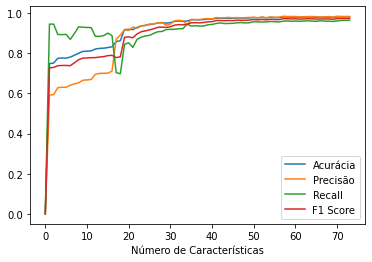

In [ ]:
df_selectKBest.to_csv("data6.csv", index = False)
grafico6 = pd.read_csv("data6.csv", index_col=0, parse_dates=True)
grafico6.plot()

# **Correlação**

In [ ]:

def calculateRFERandomForestClassifier(features, target, k):
    feature_names= np.array(X.columns.values.tolist())
    rfe = RFE(estimator = RandomForestClassifier(), n_features_to_select = k)
    model = rfe.fit(X,y)
    best_features = feature_names[model.support_]
    best_scores = rfe.estimator_.feature_importances_
    df = pd.DataFrame(list(zip(best_features, best_scores)), columns = ["features", "score"]).sort_values(by = ['score'], ascending=False)
    return df


 


       

>>> NÚMERO DE FEATURES  18 <<<
>>> RFE USING RANDOM FOREST CLASSIFIER <<<
8                  android.telephony.SmsManager
1                            onServiceConnected
15                 TelephonyManager.getDeviceId
2                                   bindService
12              TelephonyManager.getLine1Number
5                             android.os.Binder
0                                      transact
3                               attachInterface
11                    Ljava.lang.Class.getField
14             TelephonyManager.getSubscriberId
4                             ServiceConnection
17                 Ljava.lang.Class.getResource
16          TelephonyManager.getNetworkOperator
13             android.telephony.gsm.SmsManager
7                          Ljava.net.URLDecoder
9                                   ClassLoader
10    Landroid.content.Context.registerReceiver
6             Ljava.lang.Class.getCanonicalName
Name: features, dtype: object


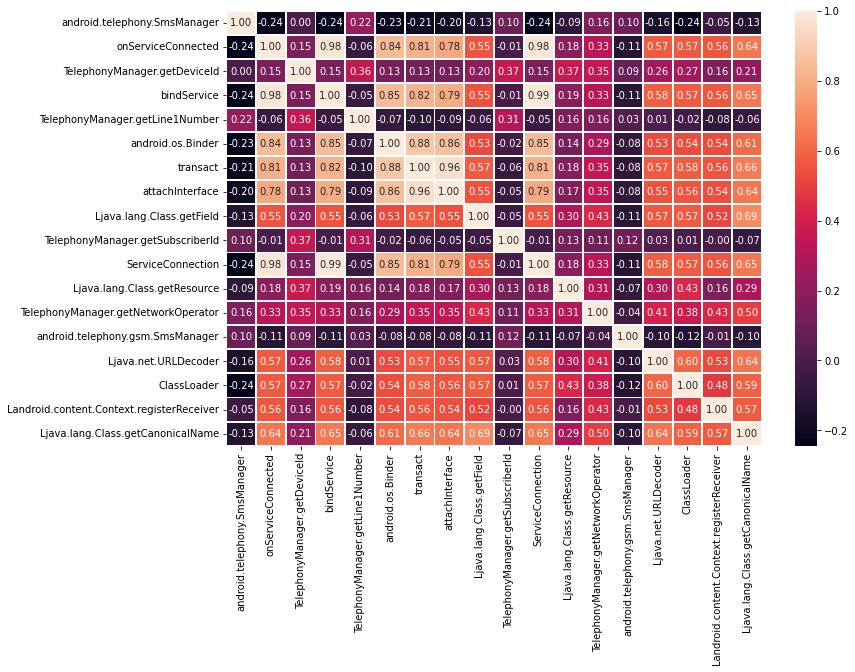

[0.12480233 0.0761187  0.08759422 0.07301645 0.05844304 0.05376811
 0.08502008 0.03942956 0.04467649 0.04059415 0.05033335 0.04549271
 0.03808288 0.04041164 0.03310729 0.03421272 0.03212949 0.04276681]
PARA REMOVER >> {'bindService', 'ServiceConnection', 'attachInterface', 'android.os.Binder'}
       android.telephony.SmsManager  onServiceConnected  \
0                                 1                   0   
1                                 1                   0   
2                                 1                   0   
3                                 0                   0   
4                                 0                   0   
...                             ...                 ...   
15026                             0                   1   
15027                             0                   0   
15028                             0                   0   
15029                             0                   1   
15030                             0                   1 

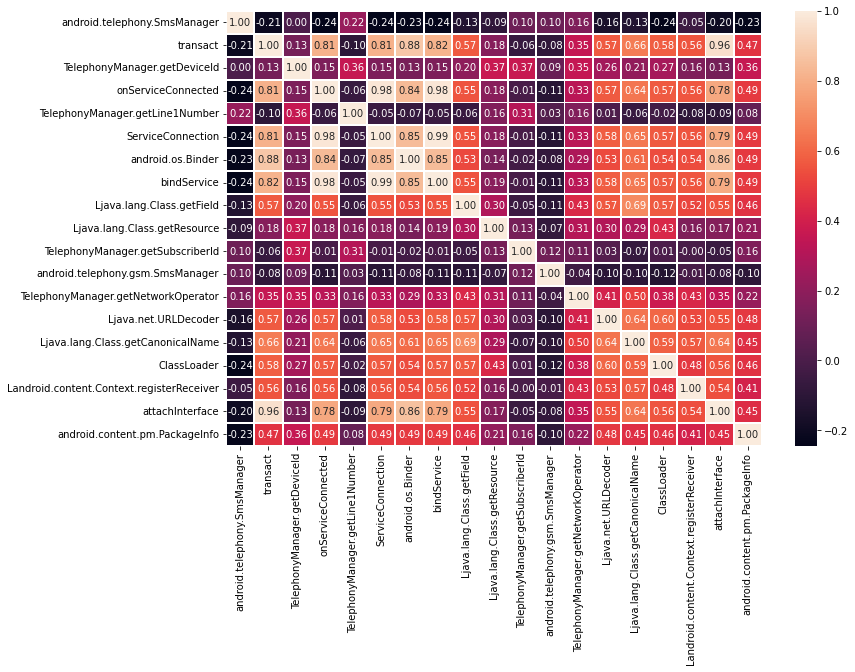

[0.12068351 0.06739226 0.08204867 0.09527814 0.06444047 0.05891422
 0.05019679 0.04878644 0.04328755 0.04063681 0.04248724 0.03841226
 0.03841028 0.0338347  0.02971784 0.03131447 0.0319889  0.05566882
 0.02650064]
PARA REMOVER >> {'ServiceConnection', 'attachInterface', 'bindService', 'android.os.Binder'}
       android.telephony.SmsManager  transact  TelephonyManager.getDeviceId  \
0                                 1         0                             0   
1                                 1         0                             0   
2                                 1         0                             0   
3                                 0         0                             1   
4                                 0         0                             1   
...                             ...       ...                           ...   
15026                             0         1                             1   
15027                             0         0                

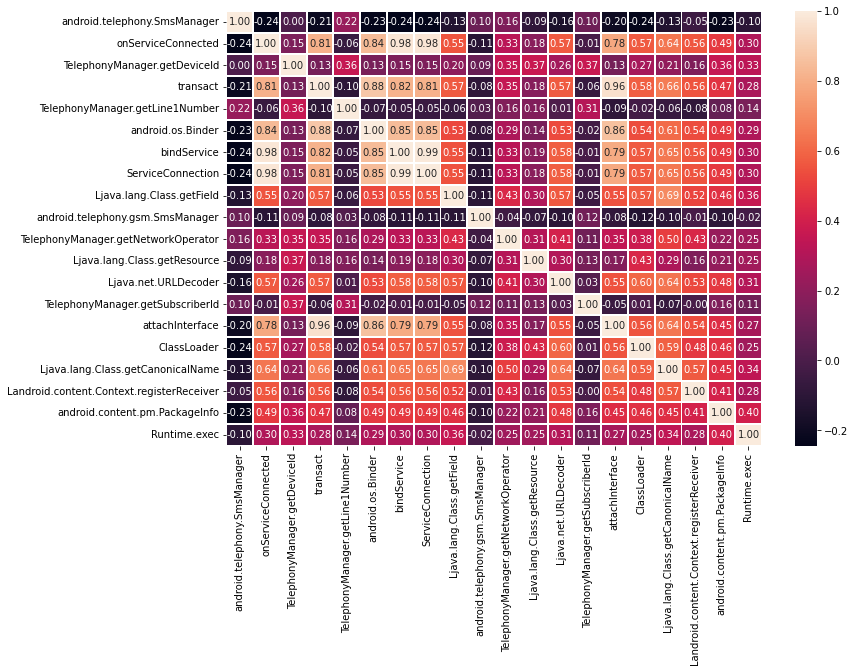

[0.11598659 0.06666455 0.07945762 0.07192603 0.05683098 0.07163823
 0.06434791 0.0485414  0.04435319 0.03786425 0.03778486 0.03927903
 0.03661066 0.04212285 0.03869575 0.02935346 0.02662162 0.0348788
 0.02819373 0.02884849]
PARA REMOVER >> {'bindService', 'ServiceConnection', 'attachInterface', 'android.os.Binder'}
       android.telephony.SmsManager  onServiceConnected  \
0                                 1                   0   
1                                 1                   0   
2                                 1                   0   
3                                 0                   0   
4                                 0                   0   
...                             ...                 ...   
15026                             0                   1   
15027                             0                   0   
15028                             0                   0   
15029                             0                   1   
15030                             

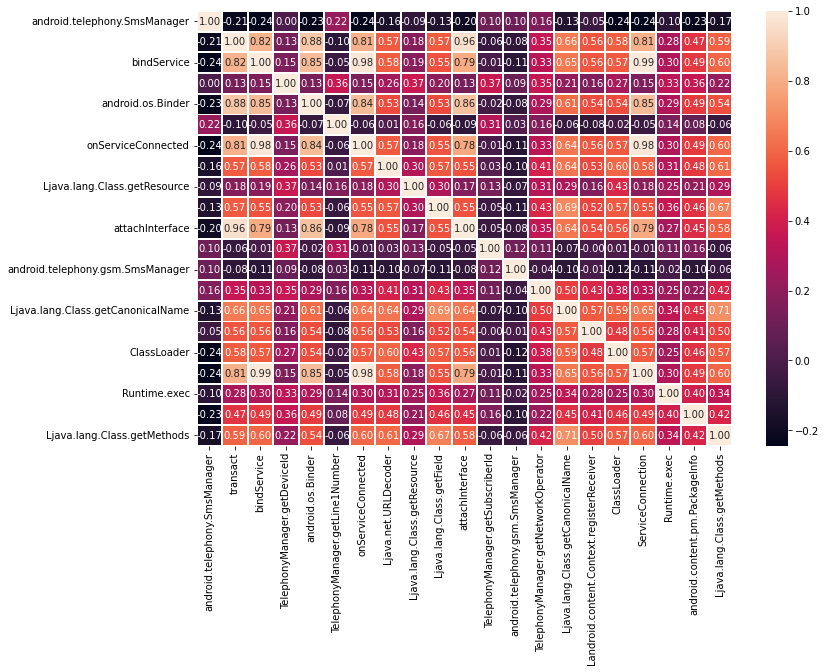

[0.12134493 0.09463294 0.05850537 0.08193043 0.03897349 0.05094325
 0.08234688 0.03916745 0.04037928 0.03837193 0.0305618  0.0403297
 0.03578194 0.03207621 0.03428004 0.02759912 0.03020997 0.0427317
 0.02624576 0.0260981  0.02748971]
PARA REMOVER >> {'bindService', 'ServiceConnection', 'attachInterface', 'android.os.Binder'}
       android.telephony.SmsManager  transact  TelephonyManager.getDeviceId  \
0                                 1         0                             0   
1                                 1         0                             0   
2                                 1         0                             0   
3                                 0         0                             1   
4                                 0         0                             1   
...                             ...       ...                           ...   
15026                             0         1                             1   
15027                             0      

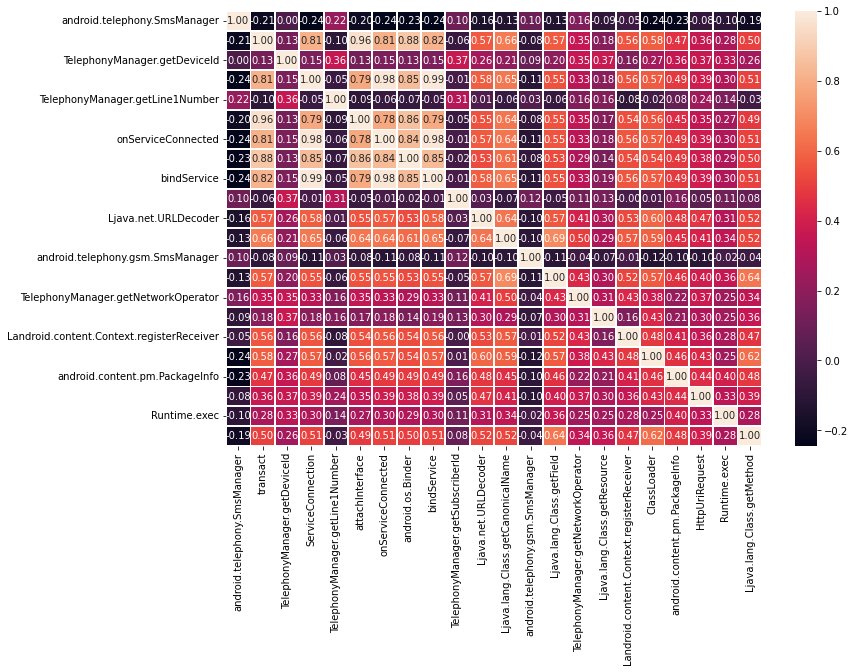

[0.11481594 0.07566348 0.07557119 0.05051982 0.05462365 0.05730218
 0.04582037 0.04783646 0.06186306 0.03675805 0.0360459  0.03627126
 0.03853566 0.03374382 0.03454903 0.03783921 0.02971385 0.03231555
 0.02775596 0.02404821 0.02532179 0.02308556]
PARA REMOVER >> {'ServiceConnection', 'attachInterface', 'onServiceConnected', 'android.os.Binder'}
       android.telephony.SmsManager  transact  TelephonyManager.getDeviceId  \
0                                 1         0                             0   
1                                 1         0                             0   
2                                 1         0                             0   
3                                 0         0                             1   
4                                 0         0                             1   
...                             ...       ...                           ...   
15026                             0         1                             1   
15027                

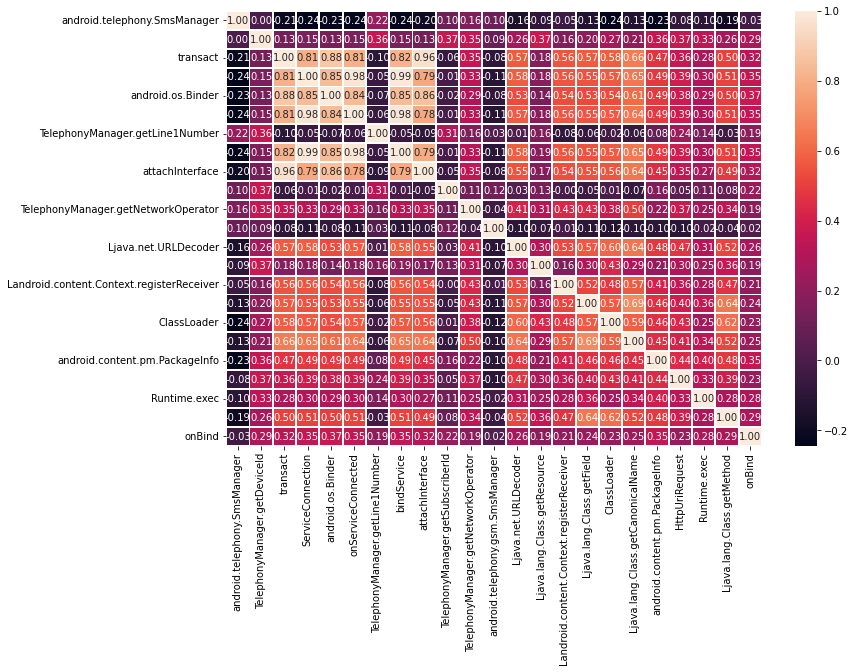

[0.10931072 0.06923887 0.08584933 0.04456332 0.04161496 0.10452417
 0.05751911 0.04343497 0.0185027  0.03568576 0.03615124 0.03638202
 0.03398298 0.03585829 0.03182428 0.03521591 0.03022202 0.02770237
 0.02555429 0.02623597 0.02556274 0.0229342  0.02212978]
PARA REMOVER >> {'ServiceConnection', 'attachInterface', 'bindService', 'android.os.Binder'}
       android.telephony.SmsManager  TelephonyManager.getDeviceId  transact  \
0                                 1                             0         0   
1                                 1                             0         0   
2                                 1                             0         0   
3                                 0                             1         0   
4                                 0                             1         0   
...                             ...                           ...       ...   
15026                             0                             1         1   
15027            

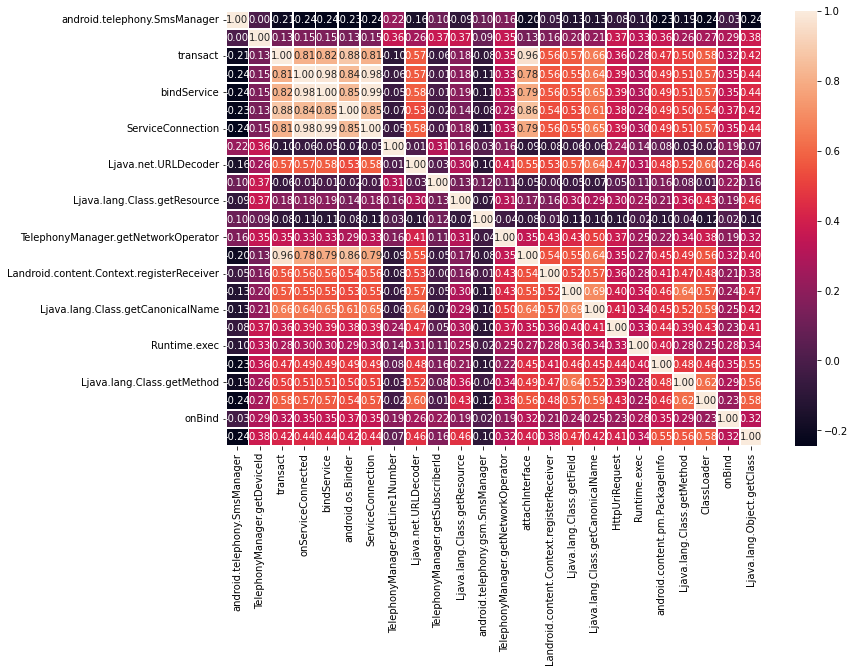

[0.10306317 0.07045529 0.06926736 0.07490126 0.04815914 0.04130002
 0.0633507  0.0586725  0.03748018 0.03648145 0.0351623  0.03503881
 0.03787939 0.02995392 0.03257745 0.0334314  0.03120755 0.02254474
 0.02508776 0.0252788  0.02235006 0.025418   0.02156    0.01937874]
PARA REMOVER >> {'bindService', 'ServiceConnection', 'attachInterface', 'android.os.Binder'}
       android.telephony.SmsManager  TelephonyManager.getDeviceId  transact  \
0                                 1                             0         0   
1                                 1                             0         0   
2                                 1                             0         0   
3                                 0                             1         0   
4                                 0                             1         0   
...                             ...                           ...       ...   
15026                             0                             1         1   
15027 

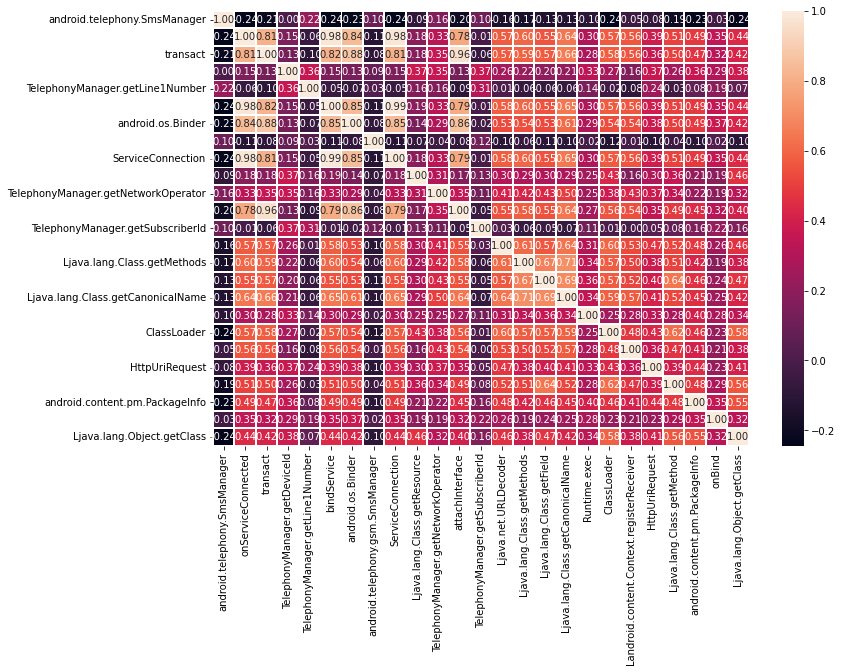

[0.10910629 0.09981764 0.08461434 0.07401335 0.0523382  0.03249271
 0.05969516 0.03488076 0.02860355 0.03255269 0.03329901 0.02753446
 0.03478278 0.0287924  0.01806841 0.02834848 0.03929692 0.02351589
 0.02225406 0.03157361 0.02271259 0.02169504 0.02186114 0.01966739
 0.01848315]
PARA REMOVER >> {'bindService', 'ServiceConnection', 'attachInterface', 'android.os.Binder'}
       android.telephony.SmsManager  onServiceConnected  transact  \
0                                 1                   0         0   
1                                 1                   0         0   
2                                 1                   0         0   
3                                 0                   0         0   
4                                 0                   0         0   
...                             ...                 ...       ...   
15026                             0                   1         1   
15027                             0                   0         0   
15028

In [ ]:

import matplotlib.pyplot as plt 
if __name__=="__main__":
    drebin = pd.read_csv('drebin_sigapi.csv')
    X = drebin.drop(columns = ['class']) #variaveis (features)
    y = drebin['class'] #classification eh a classificacao de benignos e malwares
    total_features = drebin.shape[1] - 1 #CLASS
    num_features = 18 
    
    for k in range(num_features,26):
       
       
        print(">>> NÚMERO DE FEATURES ",k, "<<<")
        

        print(">>> RFE USING RANDOM FOREST CLASSIFIER <<<")
        RFERandomForestClassifier = calculateRFERandomForestClassifier(X,y, k)
        new_X = X[list(RFERandomForestClassifier['features'])]
        print(RFERandomForestClassifier['features'])
       
        correlation = new_X.corr()
        plot = sn.heatmap(correlation, annot = True, fmt=".2f", linewidths=.9)
        plot.figure.set_size_inches(12, 8)
        plt.show()

        model_RF=RandomForestClassifier()
        model_RF.fit(new_X,y)
        RF_weights= model_RF.feature_importances_
        print(RF_weights)
        feats = {} # a dict to hold feature_name: feature_importance
        
        for feature, importance in zip(new_X.columns, model_RF.feature_importances_):
            feats[feature] = importance #add the name/value pair

        to_drop = set()

        for index in correlation.index:
            for column in correlation.columns:
                if index != column and correlation.loc[index, column] > 0.85:
                    ft = column if feats[column] <= feats[index] else index
                    to_drop.add(ft)
        print("PARA REMOVER >>", to_drop)

        new_X = new_X.drop(columns = to_drop)
        print(new_X)
        